In [81]:
import os
import numpy as np
import cv2 # OpenCV
from sklearn.svm import SVC # SVM klasifikator
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # KNN
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [99]:
def load_image(path):
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)

def display_image(image):
    plt.imshow(image, 'gray')
    
train_dir = 'D:\\FAX\\4. GOD\\soft\\veljko'

def reshape_data(input_data):
    nsamples, nx, ny = input_data.shape
    return input_data.reshape((nsamples, nx*ny))

In [163]:
def odradi(zub,negativni):
    #Učitavanje svih primera
    pos_imgs = []
    neg_imgs = []
    dim=(40,75)
    for img_name in os.listdir(train_dir):
        img_path = os.path.join(train_dir, img_name)
        img = load_image(img_path)
        img=cv2.resize(img, dim)
        if img_name[:2] == zub:
            pos_imgs.append(img)
        elif img_name[:2] == negativni:
            neg_imgs.append(img)

    print("Positive images #: ", len(pos_imgs))
    print("Negative images #: ", len(neg_imgs))   
    #
    #Izračunavanje HOG deskriptora za sve slike i formiranje niza labela
    pos_features = []
    neg_features = []
    labels = []
    winStride = (8,8)
    padding = (8,8)
    locations = ((10,20),)
    nbins = 9 # broj binova
    cell_size = (16, 16) # broj piksela po celiji
    block_size = (2, 2) # broj celija po bloku

    hog = cv2.HOGDescriptor(_winSize=(img.shape[1] // cell_size[1] * cell_size[1], 
                                  img.shape[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)
    
    for img in pos_imgs: 
        pos_features.append(hog.compute(img))  
        labels.append(1)
    
    for img in neg_imgs:
        neg_features.append(hog.compute(img))
        labels.append(0)
    
    pos_features = np.array(pos_features)
    neg_features = np.array(neg_features)
    x = np.vstack((pos_features, neg_features))
    y = np.array(labels)
    
    
    #Podela trening skupa na trening i validacioni
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    #print('Train shape: ', x_train.shape, y_train.shape)
    #print('Test shape: ', x_test.shape, y_test.shape)
    
    x_train = reshape_data(x_train)
    x_test = reshape_data(x_test)
    
    #print('Train shape: ', x_train.shape, y_train.shape)
    #print('Test shape: ', x_test.shape, y_test.shape)
    
    #Obučavanje i validacija SVM klasifikatora
    clf_svm = SVC(kernel='linear', probability=True) 
    clf_svm.fit(x_train, y_train)
    y_train_pred = clf_svm.predict(x_train)
    y_test_pred = clf_svm.predict(x_test)
    #print("Train accuracy: ", accuracy_score(y_train, y_train_pred))
    #print("Validation accuracy: ", accuracy_score(y_test, y_test_pred))
    
    #Obučavanje i validacija KNN klasifikatora
    clf_knn = KNeighborsClassifier(n_neighbors=10)
    clf_knn = clf_knn.fit(x_train, y_train)
    y_train_pred = clf_knn.predict(x_train)
    y_test_pred = clf_knn.predict(x_test)
    #print("Train accuracy: ", accuracy_score(y_train, y_train_pred))
    #print("Validation accuracy: ", accuracy_score(y_test, y_test_pred))

#### Primer testne slike

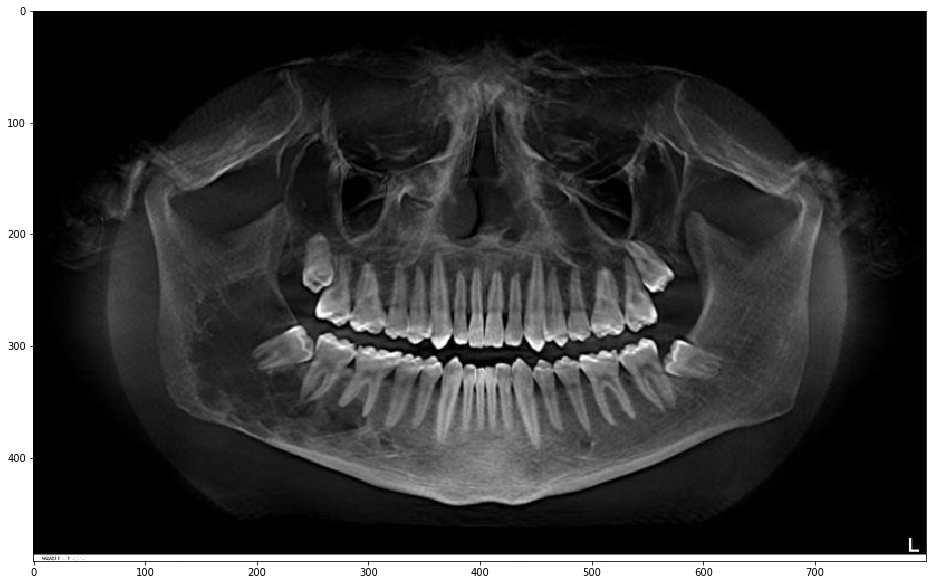

In [149]:
img = load_image('XRay.jpg') 
rows, cols= itest.shape
itest = img
#M1 = cv2.getRotationMatrix2D((cols/2,rows/2),0,1)
#itest = cv2.warpAffine(img,M1,(cols,rows))
display_image(itest)

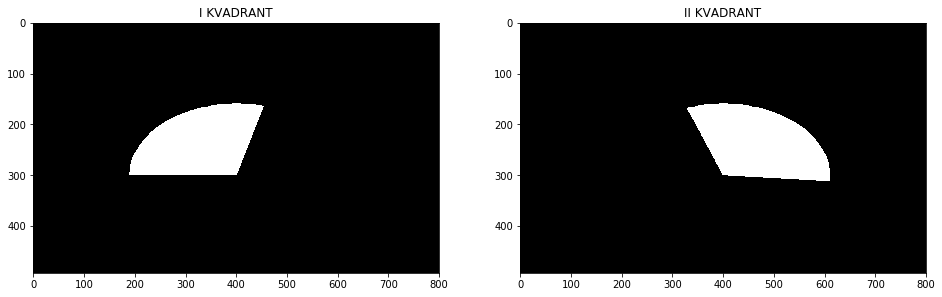

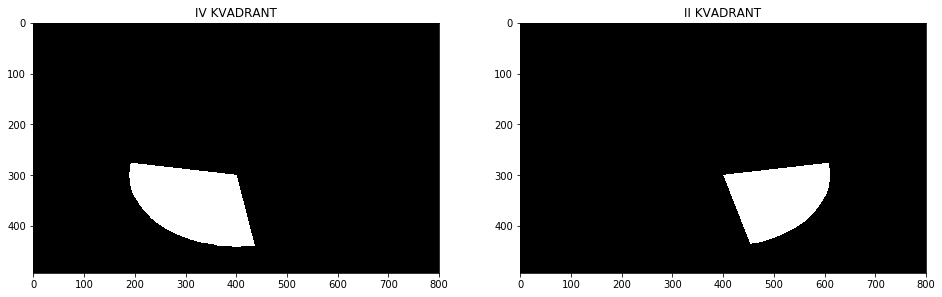

In [170]:
desno1 = desno
dole1 = dole
sirina1 =210 #200
visina1 = 140 #130

blikv1 = np.zeros((h,w,3), np.uint8) 
cv2.ellipse(blikv1,(desno1,dole1),(sirina1,visina1),0,180,285,[255,255,255],-1)
blikv2 = np.zeros((h,w,3), np.uint8) 
cv2.ellipse(blikv2,(desno1,dole1),(sirina1,visina1),0,365,250,[255,255,255],-1) 
blikv3 = np.zeros((h,w,3), np.uint8) 
cv2.ellipse(blikv3,(desno1,dole1),(sirina1,visina1),0,-10,75,[255,255,255],-1) 
blikv4 = np.zeros((h,w,3), np.uint8) 
cv2.ellipse(blikv4,(desno1,dole1),(sirina1,visina1),0,80,190,[255,255,255],-1)

plt.subplot(121)
plt.imshow(blikv1)
plt.title('I KVADRANT')

plt.subplot(122)
plt.imshow(blikv2)
plt.title('II KVADRANT')

plt.show()

plt.subplot(121)
plt.imshow(blikv4)
plt.title('IV KVADRANT')

plt.subplot(122)
plt.imshow(blikv3)
plt.title('II KVADRANT')

plt.show()

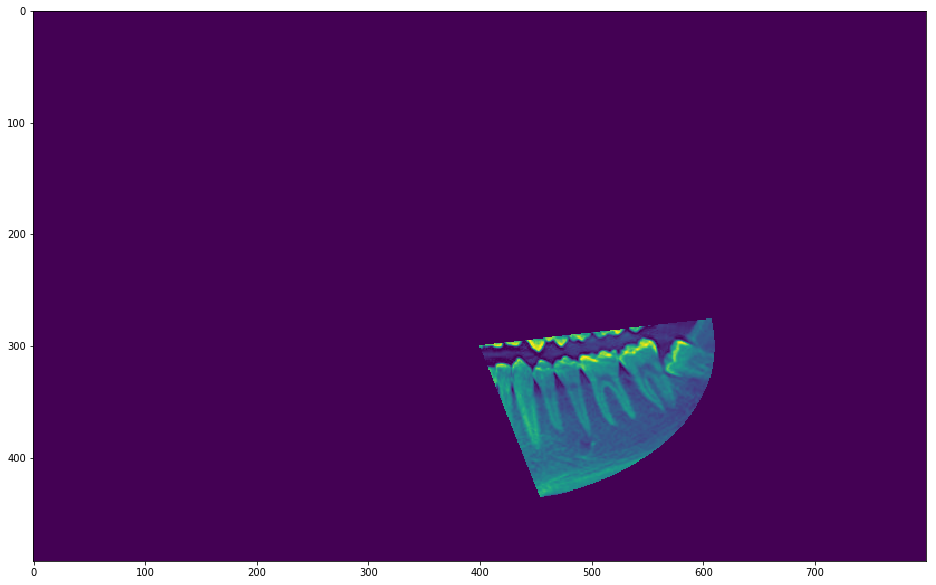

In [188]:
imgPoc = cv2.imread("XRay.jpg") 
nova = cv2.bitwise_and(imgPoc, blikv3, blikv3)
nova = cv2.cvtColor(nova, cv2.COLOR_BGR2GRAY)
#M1 = cv2.getRotationMatrix2D((cols/2,rows/2),-12,1)
#nova = cv2.warpAffine(nova,M1,(cols,rows))
plt.imshow(nova)

In [125]:
def classify_window(window):
    features = hog.compute(window).reshape(1, -1)
    return clf_svm.predict_proba(features)[0][1]
    
def sliding_window(image, step_size, window_size=(40, 75)):
    best_score = 0
    bestX = 0
    bestY = 0
    best_window = None
    for y in range(0, image.shape[0], step_size):
        for x in range(0, image.shape[1], step_size):
            this_windows = (y, x)
            window = image[y:y+window_size[1], x:x+window_size[0]]
            if window.shape == (window_size[1], window_size[0]):
                score = classify_window(window)
                if score > best_score:
                    best_score = score
                    best_window = window
                    bestX=x
                    bestY=y
    return best_score, best_window, bestX, bestY
            
def jaccard_index(tb, pb):
    y_a = max(tb[0], pb[0])
    x_a = max(tb[1], pb[1])
    y_b = max(tb[2], pb[2])
    x_b = max(tb[3], pb[3])
    print('5')
    inter = max(0, x_b - x_a + 1) * max(0, y_b - y_a + 1)
    true_area = (tb[3] - tb[1] + 1) * (tb[2] - tb[0] + 1)
    
    pred_area = (pb[3] - pb[1] + 1) * (pb[2] - pb[0] + 1)
    
    iou = inter/float(true_area + pred_area - inter)
    
    return max(iou, 0)


Positive images #:  9
Negative images #:  9
17
bestX, bestY: 380, 290
Positive images #:  9
Negative images #:  9
16
bestX, bestY: 380, 290
Positive images #:  9
Negative images #:  9
15
bestX, bestY: 380, 290
Positive images #:  9
Negative images #:  9
14
bestX, bestY: 380, 290
Positive images #:  9
Negative images #:  9
13
bestX, bestY: 380, 290
Positive images #:  9
Negative images #:  9
12
bestX, bestY: 380, 290
Positive images #:  9
Negative images #:  9
27
bestX, bestY: 380, 290
Positive images #:  9
Negative images #:  9
26
bestX, bestY: 380, 290
Positive images #:  9
Negative images #:  9
25
bestX, bestY: 380, 290
Positive images #:  9
Negative images #:  9
24
bestX, bestY: 380, 290
Positive images #:  9
Negative images #:  9
23
bestX, bestY: 380, 290
Positive images #:  9
Negative images #:  9
22
bestX, bestY: 380, 290
Positive images #:  9
Negative images #:  9
37
bestX, bestY: 380, 290
Positive images #:  9
Negative images #:  9
36
bestX, bestY: 380, 290
Positive images #:  

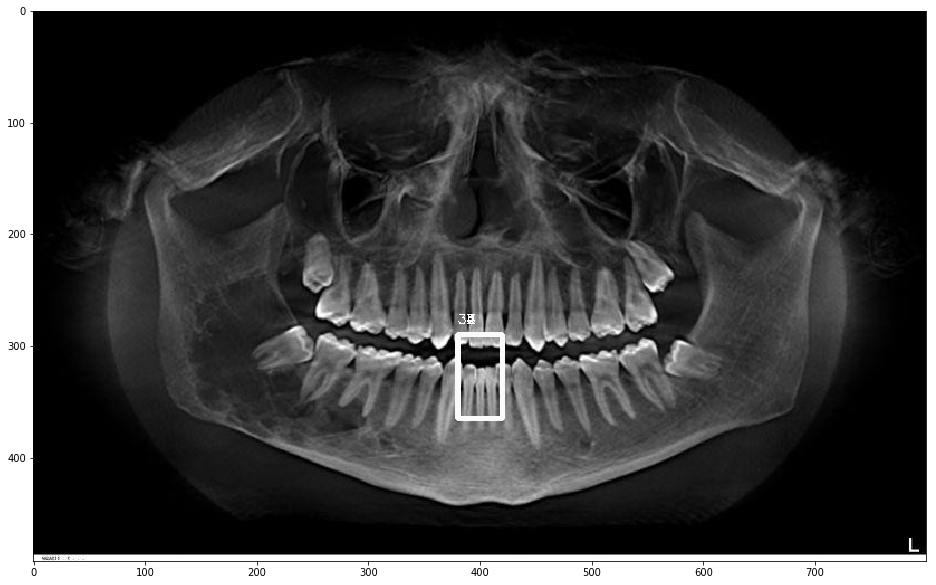

In [192]:
zubi1 = ['17','16','15','14','13','12','11']
zubi2 = ['27','26','25','24','23','22','21']
zubi3 = ['37','36','35','34','33','32','31']
zubi4 = ['47','46','45','44','43','42','41']

itestC=itest.copy()

for x in range(0,6):
    odradi(zubi1[x],'26')
    print(zubi1[x])
    score, score_window, bestX, bestY = sliding_window(itest, step_size = 10)
    cv2.putText(itestC,zubi3[x],(bestX, bestY-10),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=0.4,  color=(255, 255,255)) 
    cv2.rectangle(itestC, (bestX, bestY), (bestX+40, bestY+75),  (250, 0, 250), 3)
    print("bestX, bestY: " + str(bestX) + ", " + str(bestY))
    
for x in range(0,6):
    odradi(zubi2[x],'15')
    print(zubi2[x])
    score, score_window, bestX, bestY = sliding_window(itest, step_size = 10)
    cv2.putText(itestC,zubi3[x],(bestX, bestY-10),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=0.4,  color=(255, 255,255)) 
    cv2.rectangle(itestC, (bestX, bestY), (bestX+40, bestY+75),  (250, 0, 250), 3)
    print("bestX, bestY: " + str(bestX) + ", " + str(bestY))
    
for x in range(0,6):
    odradi(zubi3[x],'43')
    print(zubi3[x])
    score, score_window, bestX, bestY = sliding_window(itest, step_size = 10)
    cv2.putText(itestC,zubi3[x],(bestX, bestY-10),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=0.4,  color=(255, 255,255)) 
    cv2.rectangle(itestC, (bestX, bestY), (bestX+40, bestY+75),  (250, 0, 250), 3)
    print("bestX, bestY: " + str(bestX) + ", " + str(bestY))

for x in range(0,6):
    odradi(zubi4[x],'33')
    print(zubi4[x])
    score, score_window, bestX, bestY = sliding_window(itest, step_size = 10)
    cv2.putText(itestC,zubi3[x],(bestX, bestY-10),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=0.4,  color=(255, 255,255)) 
    cv2.rectangle(itestC, (bestX, bestY), (bestX+40, bestY+75),  (250, 0, 250), 3)
    print("bestX, bestY: " + str(bestX) + ", " + str(bestY))

plt.figure()
plt.imshow(itestC, 'gray')

Positive images #:  9
Negative images #:  9


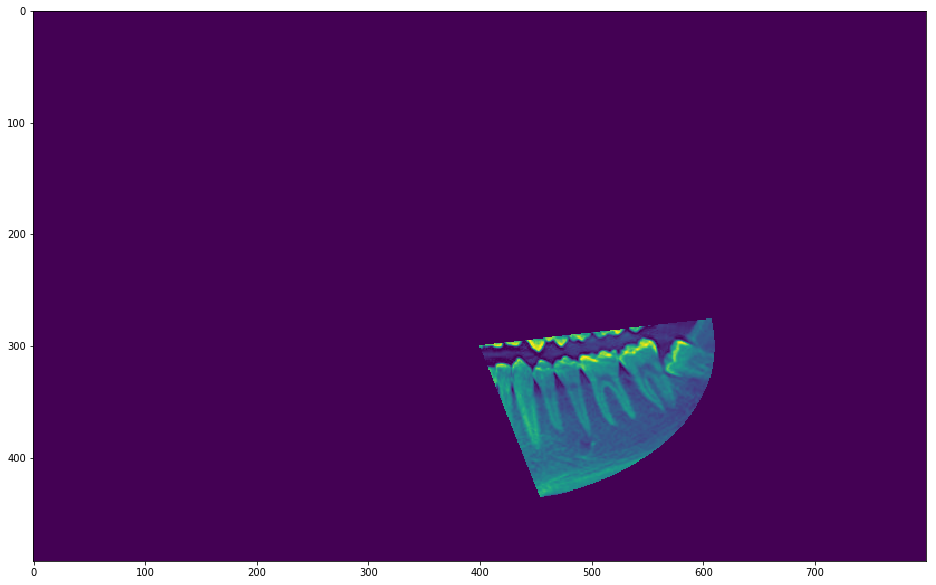

5


1.0

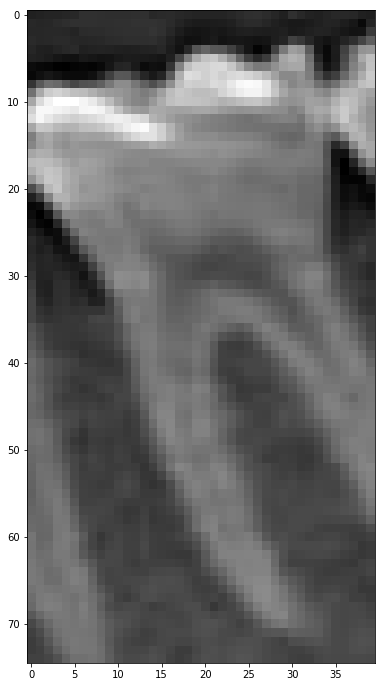

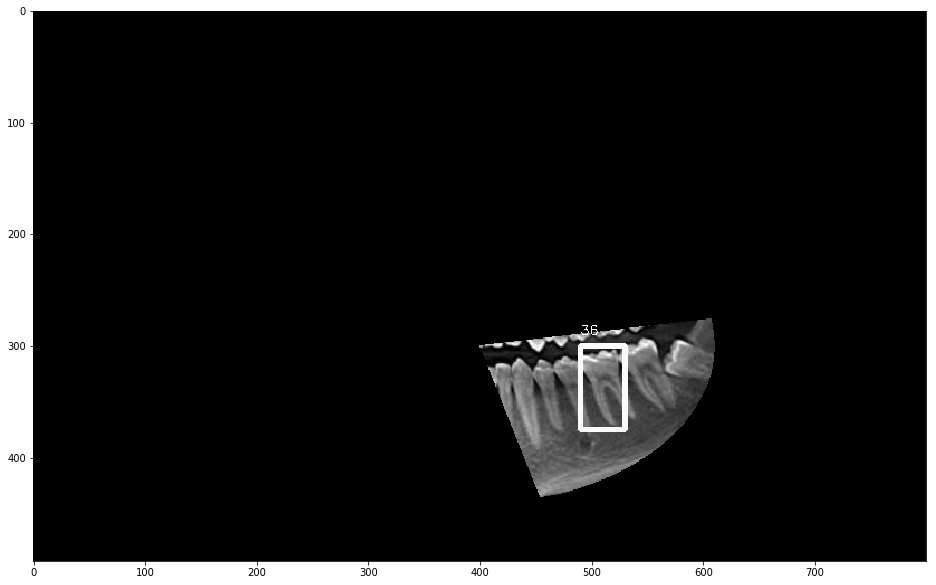

In [193]:
odradi('36','13')
plt.imshow(nova)
plt.show()
score, score_window, bestX, bestY = sliding_window(nova, step_size = 10)
itestC=nova.copy()
plt.figure()
plt.imshow(score_window, 'gray')
cv2.putText(itestC,"36",(bestX, bestY-10),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=0.4,  color=(255, 255,255)) 
cv2.rectangle(itestC, (bestX, bestY), (bestX+40, bestY+75),  (250, 0, 250), 3)
plt.figure()
plt.imshow(itestC, 'gray')
jaccard_index([48, 26, 88, 126], [50, 20, 90, 120])